## Imports

In [165]:
pip install -q seaborn

In [166]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.python.keras.layers import Dense


# Data Pre-Processing

## Download & Normalization

In [167]:
raw_data = pd.read_csv('cancer_reg.csv',encoding='latin-1')

In [168]:
raw_data.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [169]:
data = raw_data[['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']]
data = data.dropna()

len(data.columns)

31

In [170]:
X = (data-np.mean(data))/np.std(data)   # Data normalization E = 0, Var = 1

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## Principal Component Analysis

In [171]:
U, D, Vt = np.linalg.svd(X)   # Singular Value Decomposition to initiate Principal Component Analysis (PCA)

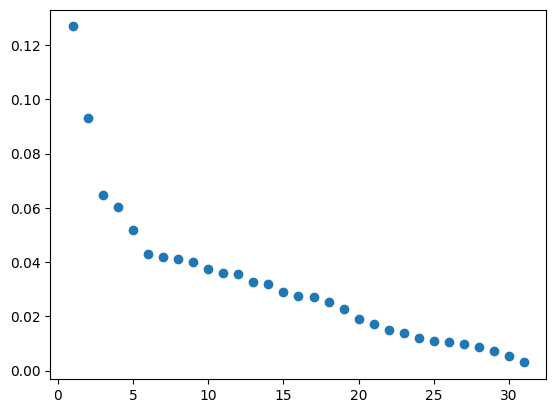

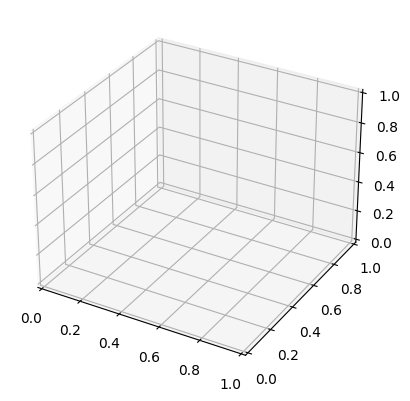

In [172]:
total_inertia = np.sum(D)

svd_inertia = []
index = []

for i in range(len(D)):

  svd_inertia.append(D[i]/total_inertia)
  index.append(i+1)

plt.scatter(index,svd_inertia)

ax = plt.figure().add_subplot(projection='3d')


Plot of decreasing singular values. Note that with the three first ones we reach 28% of total inertia of the data.

In [173]:
np.sum(svd_inertia[0:3])

0.2846661657218035

Projection of the matrix of data on principal axis

In [174]:
Xp = np.dot(X,Vt)

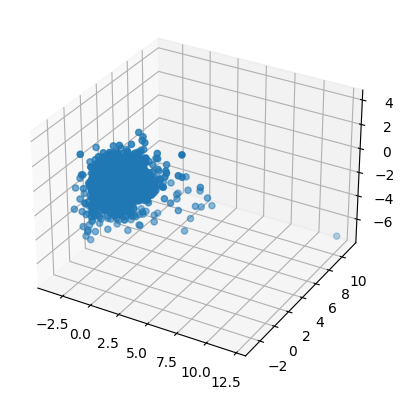

In [175]:
ax = plt.figure().add_subplot(projection='3d')

ax.scatter(Xp[:,0],Xp[:,1],Xp[:,2]) # Projection on the most relevant axis


AS we can see there are no multiple centers of class. Which means we do not need to wisely select data when creating data sets.

## Data set creation

In [176]:
train_dataset = X.sample(frac=0.8, random_state=0)
test_dataset = X.drop(train_dataset.index)

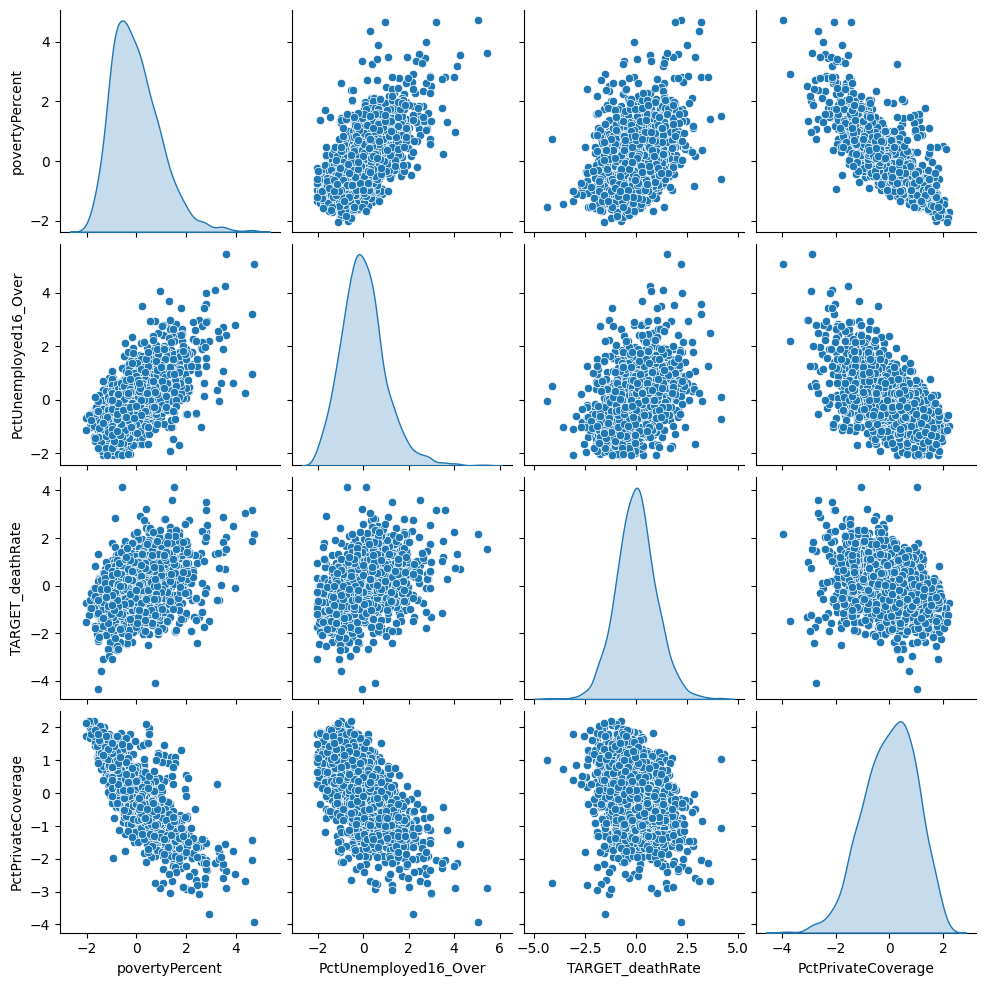

In [177]:
sns.pairplot(train_dataset[['povertyPercent','PctUnemployed16_Over', 'TARGET_deathRate', 'PctPrivateCoverage']], diag_kind='kde')

Check if a linear regression is relevant for TARGET_deathRate

In [214]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
avgAnnCount,2332.0,-2.437539e-17,1.000214,-0.419398,-0.371485,-0.303435,-0.064390,26.067493
avgDeathsPerYear,2332.0,3.046924e-17,1.000214,-0.360471,-0.311461,-0.244807,-0.081602,27.098993
TARGET_deathRate,2332.0,-7.312618e-16,1.000214,-4.338867,-0.637559,-0.011575,0.597121,4.184697
incidenceRate,2332.0,2.102378e-16,1.000214,-4.648971,-0.514833,0.099817,0.605771,10.654492
medIncome,2332.0,1.462524e-16,1.000214,-2.013534,-0.692062,-0.154676,0.447699,6.518624
popEst2015,2332.0,1.218770e-17,1.000214,-0.299684,-0.268422,-0.223542,-0.103578,29.372449
povertyPercent,2332.0,6.703233e-17,1.000214,-2.139628,-0.740279,-0.149443,0.565780,4.732732
studyPerCap,2332.0,-4.265694e-17,1.000214,-0.282104,-0.282104,-0.282104,-0.142315,16.778194
MedianAge,2332.0,8.759907e-17,1.000214,-0.517259,-0.162927,-0.092060,-0.023480,13.237694
MedianAgeMale,2332.0,-1.218770e-16,1.000214,-3.322341,-0.614498,0.004437,0.584689,3.988835


In [273]:
train_features = train_dataset.copy() # Avoid to corrupt data set
test_features = test_dataset.copy()

train_labels = train_features.pop('TARGET_deathRate') # data set without Y
test_labels = test_features.pop('TARGET_deathRate')

# Linear Regression

# Artificial Neural Network

## ANN-oneL-16

In [274]:
def build_and_compile_model():
  model = keras.Sequential([
      keras.Input(shape=(len(train_features.columns),)),
      layers.Dense(16, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.SGD(0.001))
  return model

In [275]:
target_model = build_and_compile_model()

In [276]:
target_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 16)                496       
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [277]:
%%time
history = target_model.fit(
    train_features,
    train_dataset['TARGET_deathRate'],
    validation_split=0.2,
    verbose=0, epochs=60)

CPU times: user 7.54 s, sys: 346 ms, total: 7.89 s
Wall time: 7.97 s


In [278]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [TARGET_deathRate]')
  plt.legend()
  plt.grid(True)

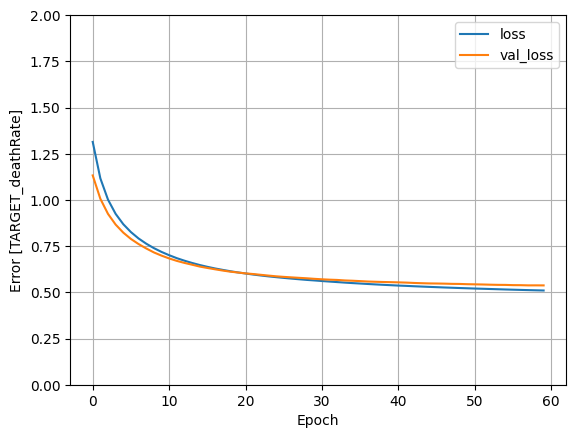

In [279]:
plot_loss(history)